In [53]:
import os, sys, time           
import numpy as np             
import matplotlib.pyplot as plt
%matplotlib inline               
import math

# input parameters

def massrateproduct(alpha):
    R_in = 1.0    # inner edge of CPD in Rjup units
    R_out = 1.85  # outer edge of CPD in AU
    R_p = 1.0     # planet radius in Rjup units
    M_p =np.logspace(-1,2,1000) # planet mass in Mjup
    Mdot=np.logspace(-8,-4, 1000)# planetary accretion rate in Mjup / yr
    # turbulence coefficient (dimension-less)
    wl = 0.85     # wavelength in mm
    dpc = 140.    # distance in pc


    # constants (cgs units)
    G = 6.67e-8        # cm**2 / g / s**2
    kB = 1.3801e-16    # erg / K
    sigSB = 5.67e-5    # erg / cm**2 / s / K**4
    mu = 2.4           # 1 / mol
    Rg = 8.3145e7      # erg / K / mol
    AU = 1.496e13      # cm
    Msun = 1.989e33    # g
    Mjup = 1.898e30    # g
    Rjup = 6.9911e9    # cm
    yr = 3.154e7       # s
    iflux=np.zeros((len(Mdot), len(M_p)))
    x=np.outer(Mdot, M_p)
    # radius grid
    for i in range(len(Mdot)):
        for j in range(len(M_p)):
            Rau = np.logspace(np.log10(R_in * Rjup / AU), 0.5, 1000)
            R = Rau * AU

            # opacities
            kappa_mm = 0.034 * (0.87 / wl)
            kappa_r = 10.                      

            # Eq 1: effective temperature: Teff**4 (K**4)
            Teff4 = 3 * G * (M_p[j] * Mjup) * (Mdot[i] * Mjup / yr) * (1 - (R[0] / R)**0.5) / (8 * np.pi * sigSB * R**3)
            Teff4 = np.clip(Teff4, 5**4, 10000**4)

            # Eq 3: irradiation temperature
            Lirr = G * (M_p[j] * Mjup) * (Mdot[i] * Mjup / yr) / (2 * R_p * Rjup)
            Tirr4 = Lirr / (40 * np.pi * R**2 * sigSB)

            # external temperature
            Tism = 10.
            Text4 = Tirr4 + Tism**4

            # Eq 6: sigma
            sig_eq6 = (2**1.4 / 3**1.2) * (sigSB * G * (M_p[j] * Mjup) * (Mdot[i] * Mjup / yr)**3 / \
                      (alpha**4 * np.pi**3 * kappa_r * R**3))**0.2 * (mu / Rg)**0.8 *(1 - (R[0] / R)**0.5)**0.6

            # Eq 7: sigma
            omega = np.sqrt(G * (M_p[j] * Mjup) / R**3)
            sig_eq7 = (Mdot[i] * Mjup / yr) * mu * omega / (3 * np.pi * alpha * Rg * Text4**0.25)

            # sigma (note that Fig 1 is for viscous heating models, which means Eq 6 for sigma [see caption])
            #sigma = np.minimum(sig_eq6, sig_eq7)
            sigma = sig_eq6

            # Eq 4: midplane temperature: Tc**4
            Tc4 = 9 * G * (M_p[j] * Mjup) * (Mdot[i] * Mjup / yr) * sigma * kappa_r * (1 - (R[0] / R)**0.5) / \
                  (128 * np.pi * sigSB * R**3) + Text4


            # mm optical depths
            tau_mm = kappa_mm * sigma / 2

            # Eq 8: brightness temperatures
            Tb = ((3 * kappa_r / (8 * kappa_mm)) * Teff4 + Text4)**0.25
            Tb[tau_mm < 0.5] = 2 * Tc4[tau_mm < 0.5]**0.25 * tau_mm[tau_mm < 0.5]
            Inu = 1e23 * 2 * kB * Tb / (wl * 0.1)**2 / (180 * 3600 / np.pi)**2



            iflux[i,j] = (np.trapz(2 * np.pi *R * Inu, R))/(math.pi*R[-1]**2)

    return iflux.flatten(), x.flatten()


###function calculates the average flux over the disk based on an alpha value input. 
##Returns a list of flux values and a list of mass-accretion rate products####

In [55]:
z=massrateproduct(0.001)

KeyboardInterrupt: 

Text(0, 0.5, 'Average CPD flux (Jy/$arsec^2$)')

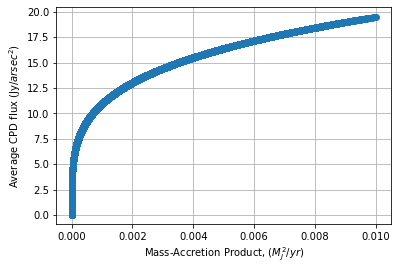

In [58]:
fig, axs = plt.subplots()
###Plot of average fluxes against Mass-Accretion Products###
axs.plot(z[1], z[0], 'o')
axs.grid()
axs.set_xlabel('Mass-Accretion Product, ($M^2_{J}/yr$)')
axs.set_ylabel('Average CPD flux (Jy/$arsec^2$)')


In [45]:
a[0,1]

2

In [46]:
M_p =np.logspace(-1,2,1000) # planet mass in Mjup
Mdot=np.logspace(-8,-4, 1000)# planetary accretion rate in Mjup / yr

print(np.outer(M_p,Mdot))

[[1.00000000e-09 1.00926219e-09 1.01861017e-09 ... 9.81729841e-06
  9.90822810e-06 1.00000000e-05]
 [1.00693863e-09 1.01626509e-09 1.02567793e-09 ... 9.88541702e-06
  9.97697764e-06 1.00693863e-05]
 [1.01392541e-09 1.02331658e-09 1.03279473e-09 ... 9.95400829e-06
  1.00462042e-05 1.01392541e-05]
 ...
 [9.86265846e-07 9.95400829e-07 1.00462042e-06 ... 9.68246612e-03
  9.77214697e-03 9.86265846e-03]
 [9.93109181e-07 1.00230755e-06 1.01159111e-06 ... 9.74964918e-03
  9.83995230e-03 9.93109181e-03]
 [1.00000000e-06 1.00926219e-06 1.01861017e-06 ... 9.81729841e-03
  9.90822810e-03 1.00000000e-02]]
